In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1)

# Loading the Datasets

In [2]:
taxi=pd.read_csv(r'F:\mohamed\3rd year\semester 2\machine learning\project\milestone 2\Milestone 2 Datasets\taxi\taxi-rides-classification.csv')

## start with Data cleaning

In [3]:
taxi.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,RideCategory
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,moderate
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,expensive
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,cheap


In [4]:
taxi.describe()

,distance,time_stamp,surge_multiplier
count,554456.000000,5.544560e+05,554456.000000
mean,2.189834,1.544046e+12,1.013946
std,1.139779,6.892123e+08,0.091999
min,0.020000,1.543200e+12,1.000000
25%,1.270000,1.543440e+12,1.000000
50%,2.160000,1.543740e+12,1.000000
75%,2.930000,1.544830e+12,1.000000
max,7.860000,1.545160e+12,3.000000


In [5]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554456 entries, 0 to 554455
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          554456 non-null  float64
 1   cab_type          554456 non-null  object 
 2   time_stamp        554456 non-null  float64
 3   destination       554456 non-null  object 
 4   source            554456 non-null  object 
 5   surge_multiplier  554456 non-null  float64
 6   id                554456 non-null  object 
 7   product_id        554456 non-null  object 
 8   name              554456 non-null  object 
 9   RideCategory      554456 non-null  object 
dtypes: float64(3), object(7)
memory usage: 42.3+ MB


In [6]:
taxi.shape

(554456, 10)

# investigate and find missing data

In [7]:
taxi.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
surge_multiplier    0
id                  0
product_id          0
name                0
RideCategory        0
dtype: int64

# investigate and find Duplicated data

In [8]:
taxi.duplicated().sum()

0

# Detecting outliers

In [9]:
taxi.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source',
       'surge_multiplier', 'id', 'product_id', 'name', 'RideCategory'],
      dtype='object')

In [10]:
taxi.skew().sort_values(ascending=False)

surge_multiplier    8.312215
distance            0.836062
time_stamp          0.431423
dtype: float64

# convert data to be normal distribution one

In [11]:
#taxi['distance']=taxi["distance"].apply(lambda x:np.log(x))

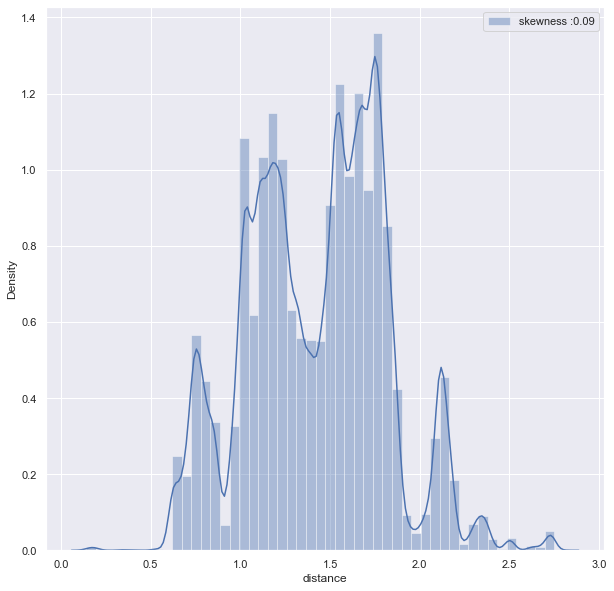

In [12]:
taxi[["distance","surge_multiplier"]]=taxi[["distance","surge_multiplier"]].apply(lambda i: np.sqrt(i))

s=sns.distplot(taxi['distance'],label="skewness :%.2f"%(taxi['distance'].skew()))
s.legend()

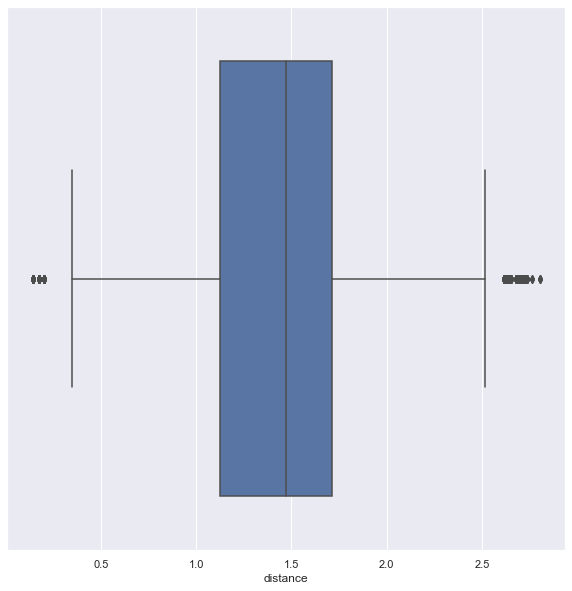

In [13]:
sns.boxplot(x=taxi['distance'])
plt.show()

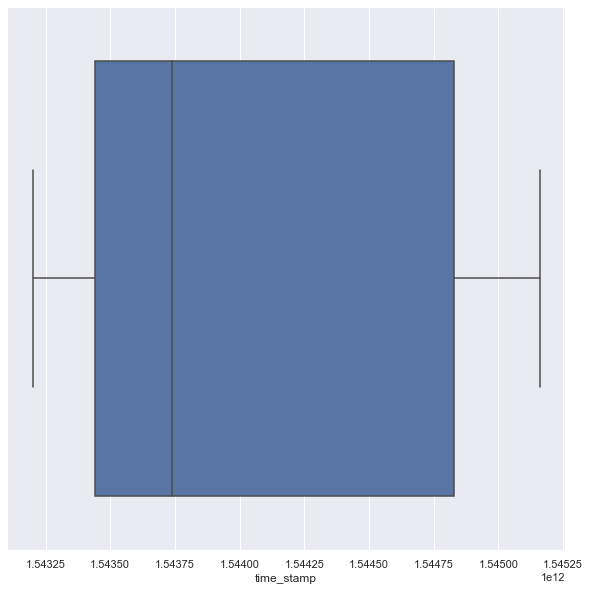

In [14]:
sns.boxplot(x=taxi['time_stamp'])
plt.show()

# remove_outliers using `IQR` method

In [15]:
def remove_outliers(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        upper_limit=Q3+1.5*IQR
        lower_limit=Q1-1.5*IQR
        # outlires are below lower limit and above upper limit
        outliers = ( ( df[col] < lower_limit) | (df[col] > upper_limit) )
        indecies=df[outliers].index
        print('number of removed outliers in {} is : {}'.format(col,len(indecies)))
        df.drop(indecies,inplace=True)

In [16]:
columns={'distance','surge_multiplier'}
remove_outliers(taxi,columns)

number of removed outliers in distance is : 2374
number of removed outliers in surge_multiplier is : 16851


In [17]:
taxi.duplicated().sum()

0

In [18]:
taxi.shape

(535231, 10)

In [19]:
taxi.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,RideCategory
0,0.787401,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown
1,1.506652,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap
2,1.414214,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,moderate
3,1.994994,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,expensive
4,1.220656,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,cheap


# we will drop this `id` feature due it doesn't provide any important information


In [20]:
taxi.drop(['id'],axis=1,inplace=True)
taxi.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,product_id,name,RideCategory
0,0.787401,Uber,1.544770e+12,West End,Haymarket Square,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown
1,1.506652,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap
2,1.414214,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,lyft,Lyft,moderate
3,1.994994,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,lyft_plus,Lyft XL,expensive
4,1.220656,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,lyft,Lyft,cheap


In [21]:
taxi['destination'].value_counts()

Financial District         45168
West End                   44818
Back Bay                   44748
South Station              44739
Fenway                     44730
Beacon Hill                44625
North End                  44621
Haymarket Square           44620
North Station              44532
Theatre District           44522
Boston University          44478
Northeastern University    43630
Name: destination, dtype: int64

In [22]:
taxi['source'].value_counts()

North End                  46040
Haymarket Square           45675
North Station              45291
West End                   45121
South Station              44907
Financial District         44638
Theatre District           44238
Beacon Hill                44093
Boston University          44070
Fenway                     43957
Northeastern University    43764
Back Bay                   43437
Name: source, dtype: int64

In [23]:
taxi['name'].value_counts()

UberX           43876
Taxi            43799
UberPool        43761
Black SUV       43690
WAV             43681
Black           43646
UberXL          43642
Shared          40841
Lyft XL         37748
Lux Black       37695
Lyft            37639
Lux             37616
Lux Black XL    37597
Name: name, dtype: int64

In [24]:
taxi['product_id'].value_counts()

55c66225-fbe7-4fd5-9072-eab1ece5e23e    43876
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    43799
997acbb5-e102-41e1-b155-9df7de0a73f2    43761
6d318bcc-22a3-4af6-bddd-b409bfce1546    43690
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    43681
6c84fd89-3f11-4782-9b50-97c468b19529    43646
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    43642
lyft_line                               40841
lyft_plus                               37748
lyft_lux                                37695
lyft                                    37639
lyft_premier                            37616
lyft_luxsuv                             37597
Name: product_id, dtype: int64

In [25]:
taxi['RideCategory'].value_counts()

moderate          173014
cheap             150920
expensive         123318
very expensive     44180
unknown            43799
Name: RideCategory, dtype: int64

In [26]:
taxi.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,product_id,name,RideCategory
0,0.787401,Uber,1.544770e+12,West End,Haymarket Square,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown
1,1.506652,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap
2,1.414214,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,lyft,Lyft,moderate
3,1.994994,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,lyft_plus,Lyft XL,expensive
4,1.220656,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,lyft,Lyft,cheap


## we will continue working on the left nominal features only after mergeing the 2 data sets

In [27]:
taxi

,distance,cab_type,time_stamp,destination,source,surge_multiplier,product_id,name,RideCategory
0,0.787401,Uber,1.544770e+12,West End,Haymarket Square,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown
1,1.506652,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap
2,1.414214,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,lyft,Lyft,moderate
3,1.994994,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,lyft_plus,Lyft XL,expensive
4,1.220656,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,lyft,Lyft,cheap
...,...,...,...,...,...,...,...,...,...
554451,1.280625,Uber,1.543620e+12,Back Bay,Northeastern University,1.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,moderate
554452,0.959166,Uber,1.543550e+12,North Station,North End,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,expensive
554453,1.630951,Uber,1.543530e+12,Theatre District,Fenway,1.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,moderate
554454,1.726268,Uber,1.543650e+12,Theatre District,Boston University,1.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,moderate


***

# now let's move to work on weather data

*** 

In [28]:
weather=pd.read_csv(r'F:\mohamed\3rd year\semester 2\machine learning\project\milestone 2\Milestone 2 Datasets\taxi\weather.csv')

In [29]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [30]:
weather.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [31]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [32]:
weather.shape

(6276, 8)

In [33]:
weather.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [34]:
print(' percentage of missing rain values  = {}'.format((weather['rain'].isnull().sum()/len(weather))*100))


 percentage of missing rain values  = 85.75525812619503


## percentage of missing rain values is about 85% so we will drop rain column 

In [35]:
weather.drop(['rain'],axis=1,inplace=True)

In [36]:
weather.isnull().sum()

temp          0
location      0
clouds        0
pressure      0
time_stamp    0
humidity      0
wind          0
dtype: int64

# find duplicate data

In [37]:
weather.duplicated().sum()

0

# Detecting outliers

In [38]:
weather.columns

Index(['temp', 'location', 'clouds', 'pressure', 'time_stamp', 'humidity',
       'wind'],
      dtype='object')

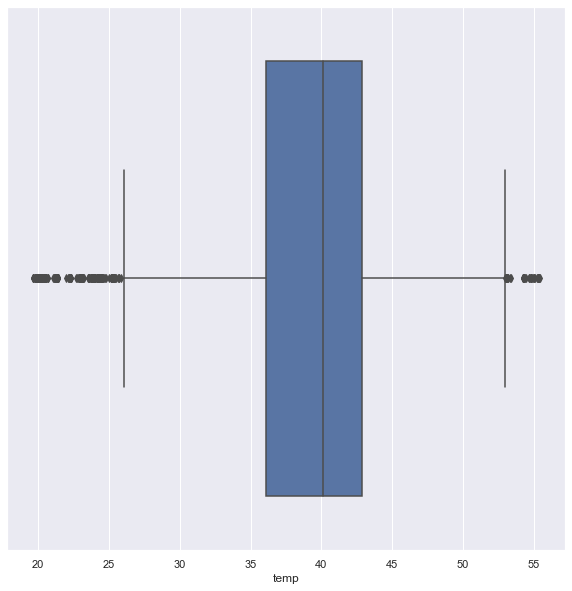

In [39]:
sns.boxplot(x=weather['temp'])
plt.show()

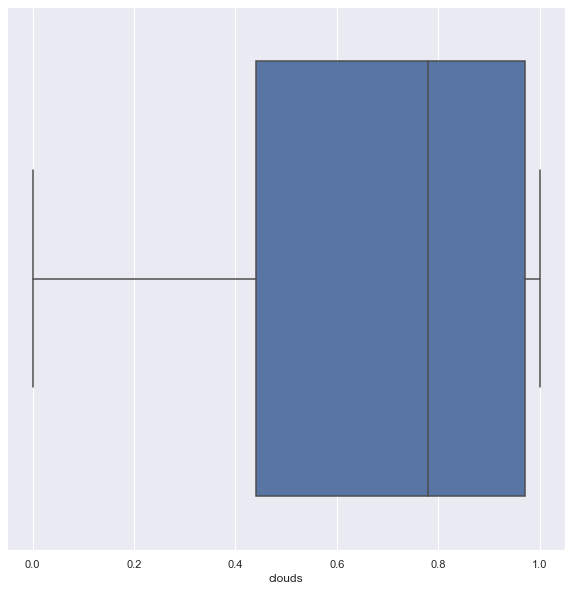

In [40]:
sns.boxplot(x=weather['clouds'])
plt.show()

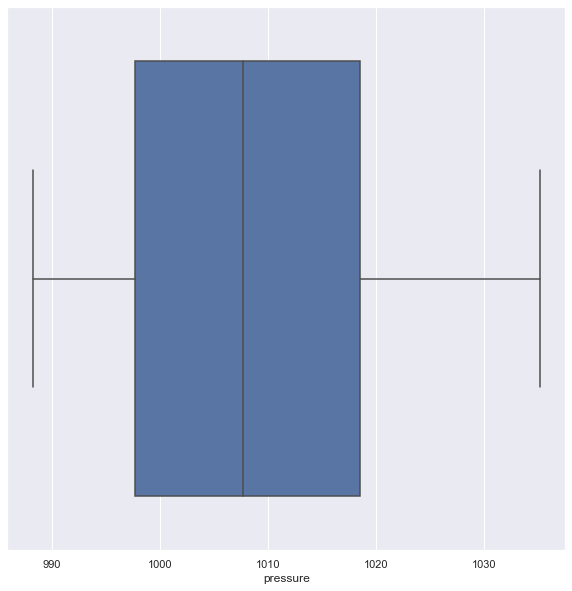

In [41]:
sns.boxplot(x=weather['pressure'])
plt.show()

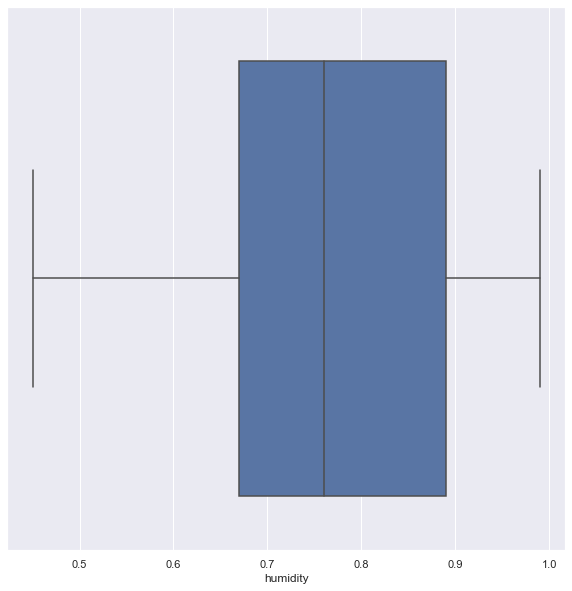

In [42]:
sns.boxplot(x=weather['humidity'])
plt.show()

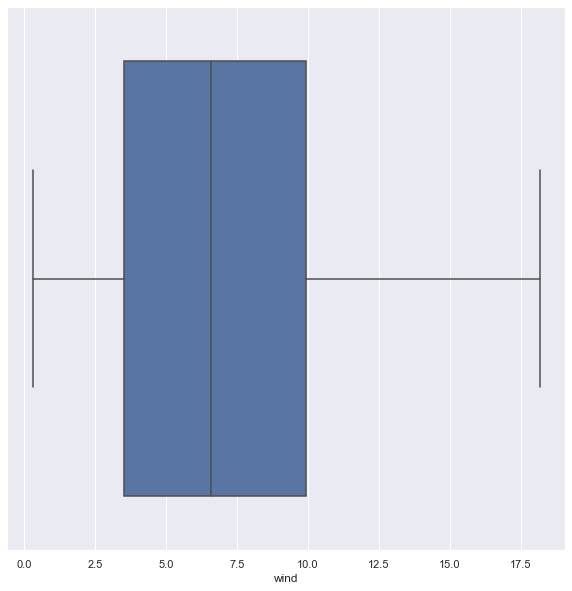

In [43]:
sns.boxplot(x=weather['wind'])
plt.show()

## there are clear outliers on temp column so let's remove it

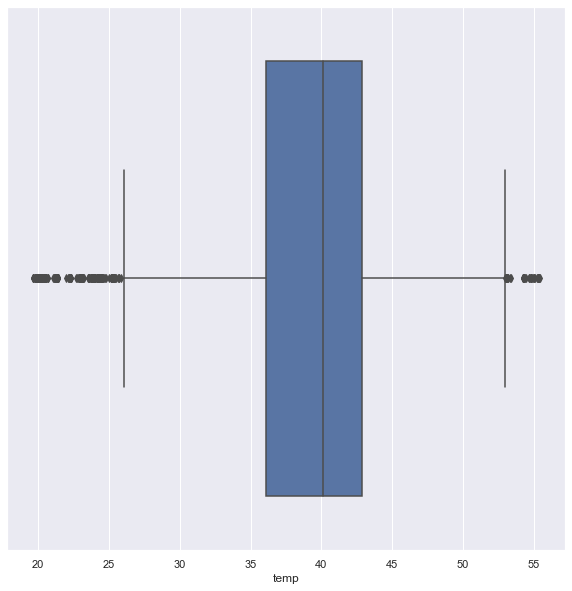

In [44]:
sns.boxplot(x=weather['temp'])
plt.show()

## - After I have removed these outliers using `IQR` method ,the boxplot still contains other outliers

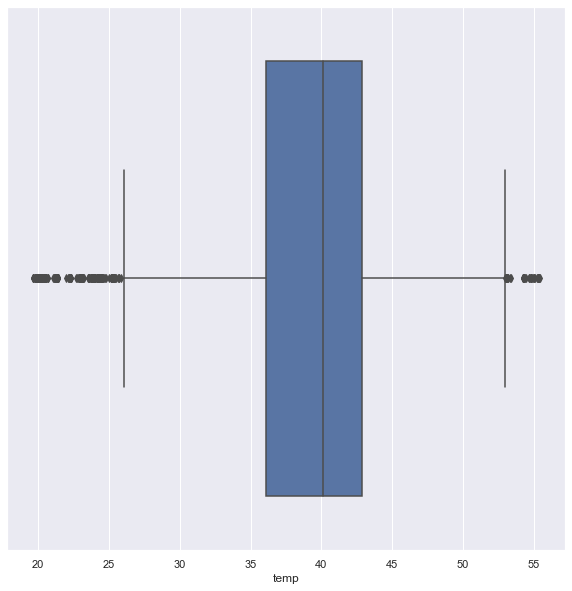

number of outliers in temp is : 401


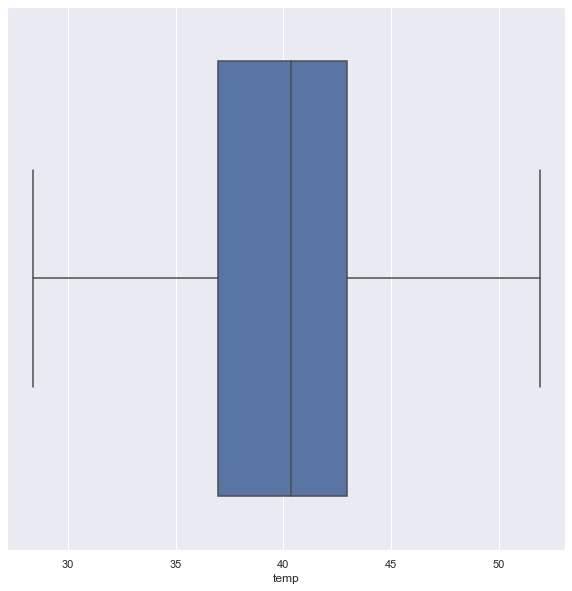

In [45]:
def MAD(df,col,thresh_hold):
    sns.boxplot(x=df[col])
    plt.show()
    from scipy import stats
    med = float(np.median(df[col], axis = 0))
    mad = (stats.median_absolute_deviation(df[col]))
    outlier = []
    for i, v in enumerate(df[col]):
        t = (v-med)/mad
        if t > thresh_hold or t<-thresh_hold:
            outlier.append(i)
        else:
            continue
    print('number of outliers in {} is : {}'.format( col,len(outlier)))

    d=df.drop(outlier)
    sns.boxplot(x=d[col])
    plt.show()
    return d

weath=MAD(weather,'temp',thresh_hold=2.3)

In [46]:
weath.head()

,temp,location,clouds,pressure,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,1545003901,0.75,11.49


In [47]:
weath.shape

(5875, 7)

In [48]:
taxi['destination'].unique().sort()==weath['location'].unique().sort()

True

In [49]:
weath['location'].value_counts()

Haymarket Square           492
Back Bay                   491
North End                  491
Beacon Hill                490
North Station              490
Boston University          490
West End                   489
Fenway                     489
Northeastern University    489
Theatre District           488
South Station              488
Financial District         488
Name: location, dtype: int64

weath=pd.get_dummies(data=weath,columns=['location'])

# Let's merge our data

In [50]:
print('weather shape:{}'.format(weath.shape))
print('Taxi shape:{}'.format(taxi.shape))

weather shape:(5875, 7)
Taxi shape:(535231, 9)


In [51]:
data=taxi.copy()
data2=weath.copy()

In [52]:
from datetime import datetime
data['time_stamp'] = data['time_stamp'].astype(str)
data2['time_stamp'] = data2['time_stamp'].astype(str)
data['time_stamp'] = data['time_stamp'].str[:7]
data2['time_stamp'] = data2['time_stamp'].str[:7]
data.head(5)

,distance,cab_type,time_stamp,destination,source,surge_multiplier,product_id,name,RideCategory
0,0.787401,Uber,1544770,West End,Haymarket Square,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown
1,1.506652,Uber,1543400,Boston University,Beacon Hill,1.0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap
2,1.414214,Lyft,1544920,Back Bay,Haymarket Square,1.0,lyft,Lyft,moderate
3,1.994994,Lyft,1543620,Financial District,Northeastern University,1.0,lyft_plus,Lyft XL,expensive
4,1.220656,Lyft,1543580,Back Bay,Northeastern University,1.0,lyft,Lyft,cheap


In [53]:
data2.rename(columns={'location':'destination'},inplace=True)
data2.head(5)

,temp,destination,clouds,pressure,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,1545003,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,1545003,0.76,11.32
2,42.50,Boston University,1.0,1012.15,1545003,0.76,11.07
3,42.11,Fenway,1.0,1012.13,1545003,0.77,11.09
4,43.13,Financial District,1.0,1012.14,1545003,0.75,11.49


In [54]:
mergedf = data2.merge(data, how='inner')
mergedf.shape

(204401, 14)

In [55]:
mergedf.duplicated().sum() == 0

False

In [56]:
mergedf.drop_duplicates(inplace=True)
mergedf.duplicated().sum() == 0
mergedf.shape

(125120, 14)

In [57]:
data=mergedf.copy()

# Applying some Exploratory Data Analysis and Visualization

##

<AxesSubplot:xlabel='RideCategory', ylabel='count'>

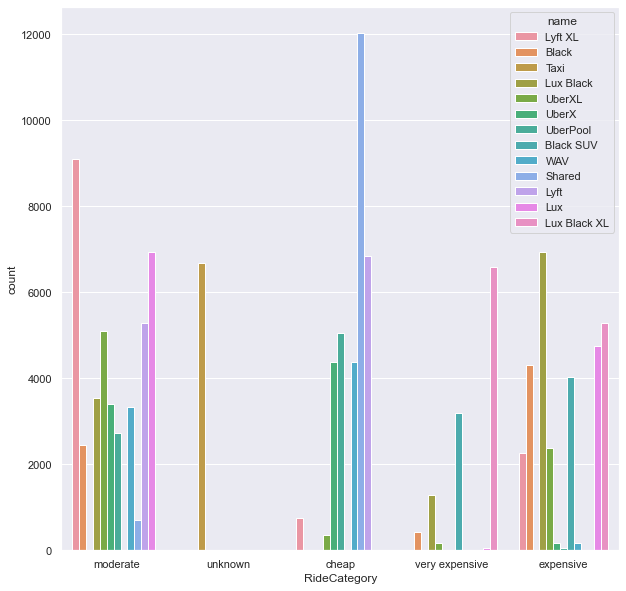

In [58]:
sns.countplot(data=data,x='RideCategory',hue='name')

<AxesSubplot:xlabel='cab_type'>

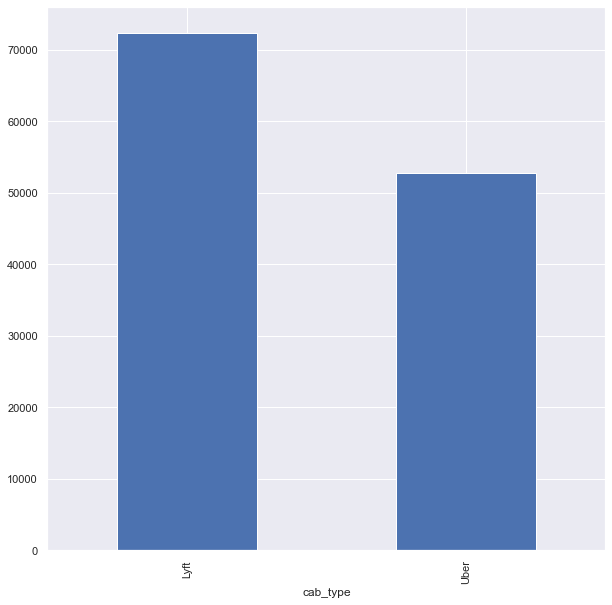

In [59]:
data.groupby('cab_type')['RideCategory'].count().plot(kind='bar')

# let's apply feature selection 

In [60]:
data

,temp,destination,clouds,pressure,time_stamp,humidity,wind,distance,cab_type,source,surge_multiplier,product_id,name,RideCategory
0,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,1.545962,Lyft,Beacon Hill,1.0,lyft_plus,Lyft XL,moderate
1,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,0.741620,Uber,Theatre District,1.0,6c84fd89-3f11-4782-9b50-97c468b19529,Black,moderate
2,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,1.462874,Uber,West End,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown
3,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,0.663325,Lyft,Financial District,1.0,lyft_lux,Lux Black,moderate
4,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,1.473092,Uber,North Station,1.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204388,40.31,West End,0.86,994.07,1543440,0.66,9.54,1.754993,Lyft,Boston University,1.0,lyft_line,Shared,cheap
204390,40.31,West End,0.86,994.07,1543440,0.66,9.54,1.417745,Lyft,South Station,1.0,lyft,Lyft,moderate
204394,40.31,West End,0.86,994.07,1543440,0.66,9.54,0.824621,Uber,Haymarket Square,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,expensive
204395,40.31,West End,0.86,994.07,1543440,0.66,9.54,1.086278,Uber,South Station,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,expensive


In [61]:
x = data.drop(['RideCategory','destination','source','product_id','name','cab_type'],axis=1)
y = data['RideCategory']

In [62]:
chi_scores = chi2(x,y)

In [63]:
chi_scores

(array([9.38172095e-01, 1.21443264e-01, 6.30094483e+00, 7.19805289e-01,
        1.22265832e-01, 6.86190830e+01, 1.51454218e+03, 0.00000000e+00]),
 array([9.19021670e-01, 9.98229399e-01, 1.77772568e-01, 9.48864253e-01,
        9.98205822e-01, 4.44065997e-14, 0.00000000e+00, 1.00000000e+00]))

In [64]:
p_values = pd.Series(chi_scores[1],index = x.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

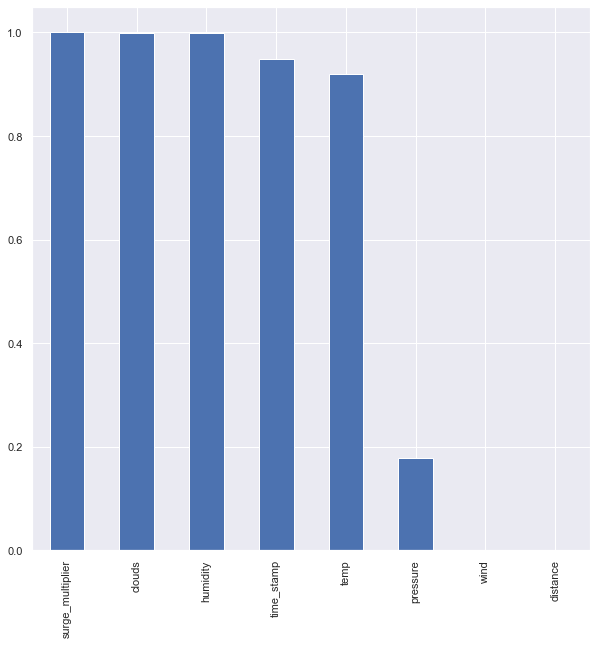

In [65]:
p_values.plot.bar()

In [66]:
datas=data.drop(['surge_multiplier','clouds','humidity','time_stamp','temp','pressure','destination','source','product_id','wind'],axis=1)

In [67]:
#1#1st try the above
#2nd drop the below ones as well

In [68]:
#data.drop(['destination','source','product_id'],axis=1,inplace=True)

In [69]:
datas.shape

(125120, 4)

In [70]:
datas.head()

,distance,cab_type,name,RideCategory
0,1.545962,Lyft,Lyft XL,moderate
1,0.741620,Uber,Black,moderate
2,1.462874,Uber,Taxi,unknown
3,0.663325,Lyft,Lux Black,moderate
4,1.473092,Uber,UberXL,moderate


# After we have tried merging our taxi data with weather,we tried to apply feature selection to find which variables of weather 

- data we are going to use ,finally we can conclude that we will no longer use weather data and we will use the whole records 

- of the Taxi data 

In [71]:
taxi.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,product_id,name,RideCategory
0,0.787401,Uber,1.544770e+12,West End,Haymarket Square,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown
1,1.506652,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap
2,1.414214,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,lyft,Lyft,moderate
3,1.994994,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,lyft_plus,Lyft XL,expensive
4,1.220656,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,lyft,Lyft,cheap


In [72]:
taxi.duplicated().sum()

193956

In [73]:
taxi.shape

(535231, 9)

## apply new feature again

In [74]:
taxi=taxi.drop(['surge_multiplier','time_stamp'],axis=1)#try #'destination','source','product_id'

In [75]:
taxi.head()

,distance,cab_type,destination,source,product_id,name,RideCategory
0,0.787401,Uber,West End,Haymarket Square,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown
1,1.506652,Uber,Boston University,Beacon Hill,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap
2,1.414214,Lyft,Back Bay,Haymarket Square,lyft,Lyft,moderate
3,1.994994,Lyft,Financial District,Northeastern University,lyft_plus,Lyft XL,expensive
4,1.220656,Lyft,Back Bay,Northeastern University,lyft,Lyft,cheap


In [76]:
d=taxi.copy()
d.head()

,distance,cab_type,destination,source,product_id,name,RideCategory
0,0.787401,Uber,West End,Haymarket Square,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown
1,1.506652,Uber,Boston University,Beacon Hill,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap
2,1.414214,Lyft,Back Bay,Haymarket Square,lyft,Lyft,moderate
3,1.994994,Lyft,Financial District,Northeastern University,lyft_plus,Lyft XL,expensive
4,1.220656,Lyft,Back Bay,Northeastern University,lyft,Lyft,cheap


In [77]:
d=pd.get_dummies(data=taxi,columns=['name','destination','source','product_id','cab_type'])
lbl_Ridge=LabelEncoder()
d['RideCategory']=lbl_Ridge.fit_transform(d['RideCategory'])

In [78]:
d.head()

,distance,RideCategory,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,...,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,cab_type_Lyft,cab_type_Uber
0,0.787401,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.506652,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.414214,2,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1.994994,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,1.220656,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [79]:
# unknown =3
#cheap = 0
#moderate=2
#epensive=1
#very expensive=4

In [80]:
d['RideCategory'].value_counts()

2    173014
0    150920
1    123318
4     44180
3     43799
Name: RideCategory, dtype: int64

In [81]:
d

,distance,RideCategory,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,...,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,cab_type_Lyft,cab_type_Uber
0,0.787401,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.506652,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.414214,2,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1.994994,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,1.220656,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554451,1.280625,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
554452,0.959166,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
554453,1.630951,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
554454,1.726268,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
x=d.drop('RideCategory',axis=1)
y=d[['RideCategory']]

In [83]:
x

,distance,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,...,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,cab_type_Lyft,cab_type_Uber
0,0.787401,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1.506652,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.414214,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1.994994,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1.220656,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554451,1.280625,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
554452,0.959166,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
554453,1.630951,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
554454,1.726268,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [84]:
y

,RideCategory
0,3
1,0
2,2
3,1
4,0
...,...
554451,2
554452,1
554453,2
554454,2


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [87]:
print('train:',x_train.shape)
print('test:',x_test.shape)

train: (428184, 53)
test: (107047, 53)


# Training phase

## we will use 
- Decision tree 
- Random forest 
- Adaboost
- logistic rgression

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import time
import joblib

## Decision Tree

Total training time:  4.084328651428223 seconds
Total testing time:  0.06678962707519531 seconds
trainning acc=90.26026194346356 %
testing acc=90.1370426074528 %


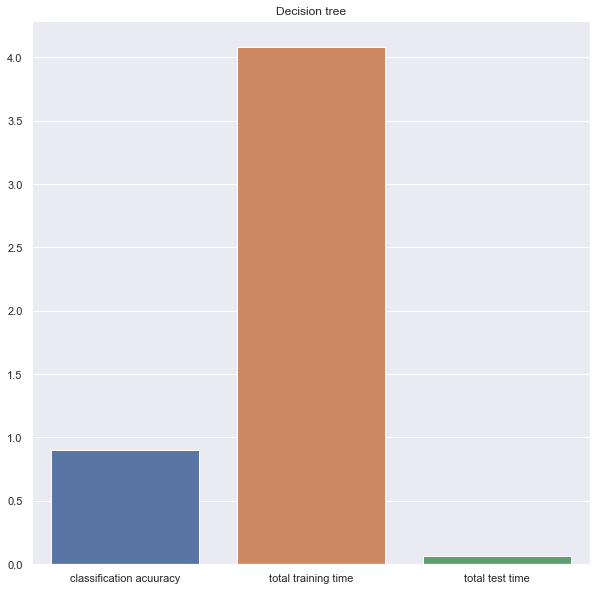

In [96]:
# Training the model
model_tree = DecisionTreeClassifier(criterion='entropy',max_depth=25,min_samples_leaf=20,min_samples_split=50,random_state=42)

start=time.time()
model_tree.fit(x_train,y_train)
end=time.time()
Total_training_time=end- start
print("Total training time: ", Total_training_time, "seconds")

# Saving the model to decision_tree.pkl
joblib.dump(model_tree, 'decision_tree.pkl')

# Making predictions
y_pred_train_dtree=model_trees.predict(x_train)

start=time.time()
y_pred_test_dtree=model_trees.predict(x_test)
end=time.time()
Total_testing_time=end- start
print("Total testing time: ", Total_testing_time, "seconds")

# Calculating accuracies
t_acc=accuracy_score(y_train,y_pred_train_dtree)
v_acc=accuracy_score(y_test,y_pred_test_dtree)

print('trainning acc={} %'.format(t_acc*100))
print('testing acc={} %'.format(v_acc*100))

#visualize 
bars=pd.DataFrame({'classification acuuracy':[t_acc],'total training time':[Total_training_time],'total test time':[Total_testing_time]})
sns.barplot(data=bars)
plt.title("Decision tree")
plt.show()

## RandomForest

Total training time:  9.287339210510254 seconds
Total testing time:  0.39049863815307617 seconds
trainning acc=89.79153821721503 %
testing acc=89.83063514157332 %


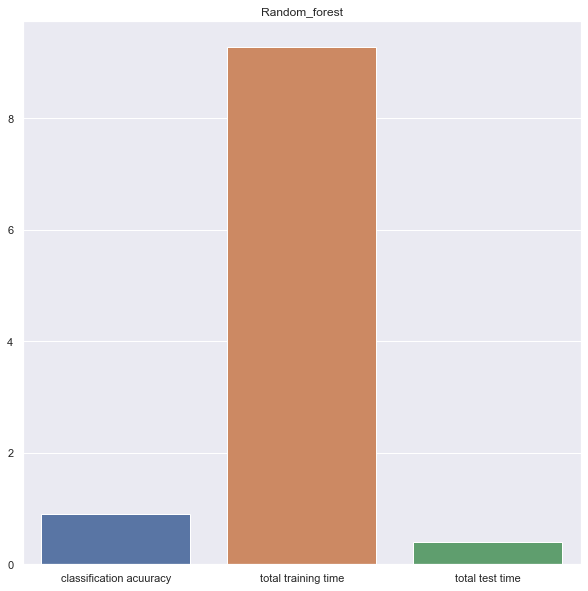

In [123]:
model_forest = RandomForestClassifier(n_estimators=15, min_samples_split= 150 , min_samples_leaf= 50 , random_state=42,max_depth=20)

start=time.time()
model_forest.fit(x_train ,y_train )
end=time.time()
Total_training_time=end- start
print("Total training time: ", Total_training_time, "seconds")

# Saving the model to Random_forest.pkl
joblib.dump(model_forest, 'Random_forest.pkl')
#model_forests=joblib.load('Random_forest.pkl')

# Making predictions
y_pred_train_forest=model_forest.predict(x_train)

start=time.time()
y_pred_test_forest=model_forest.predict(x_test)
end=time.time()
Total_testing_time=end- start
print("Total testing time: ", Total_testing_time, "seconds")

# Calculating accuracies
t_acc=accuracy_score(y_train,y_pred_train_forest)
v_acc=accuracy_score(y_test,y_pred_test_forest)

print('trainning acc={} %'.format(t_acc*100))
print('testing acc={} %'.format(v_acc*100))

#visualize 
bars=pd.DataFrame({'classification acuuracy':[t_acc],'total training time':[Total_training_time],'total test time':[Total_testing_time]})
sns.barplot(data=bars)
plt.title("Random_forest")
plt.show()

## AdaBoost

Total training time:  25.067487001419067 seconds
Total testing time:  0.40131330490112305 seconds
trainning acc=90.40926330736319 %
testing acc=89.86706773660168 %


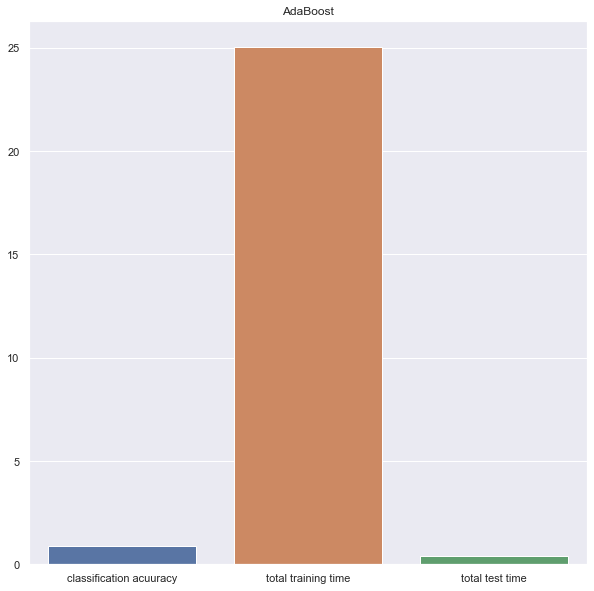

In [124]:
model_adaboost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20),n_estimators=5)

start=time.time()
model_adaboost.fit(x_train ,y_train )
end=time.time()
Total_training_time=end- start
print("Total training time: ", Total_training_time, "seconds")

# Saving the model to Random_forest.pkl
joblib.dump(model_adaboost, 'Random_adaboost.pkl')
#model_adaboosts=joblib.load('Random_adaboost.pkl')

# Making predictions
y_pred_train_adaboost=model_adaboost.predict(x_train)

start=time.time()
y_pred_test_adaboost=model_adaboost.predict(x_test)
end=time.time()
Total_testing_time=end- start
print("Total testing time: ", Total_testing_time, "seconds")

# Calculating accuracies
t_acc=accuracy_score(y_train,y_pred_train_adaboost)
v_acc=accuracy_score(y_test,y_pred_test_adaboost)

print('trainning acc={} %'.format(t_acc*100))
print('testing acc={} %'.format(v_acc*100))

#visualize 
bars=pd.DataFrame({'classification acuuracy':[t_acc],'total training time':[Total_training_time],'total test time':[Total_testing_time]})
sns.barplot(data=bars)
plt.title("AdaBoost")
plt.show()

## LogisticRegression

Total training time:  27.39924192428589 seconds
Total testing time:  0.04886984825134277 seconds
trainning acc=88.87230723240475 %
testing acc=88.99735630143769 %


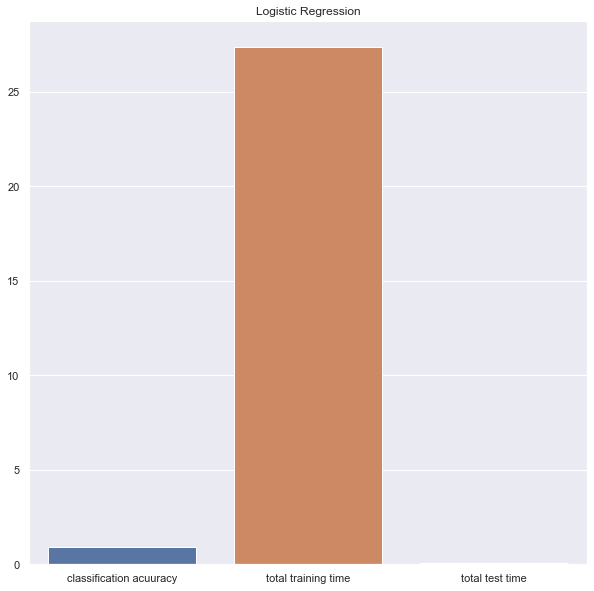

In [136]:
model_log=LogisticRegression(max_iter=100,C=10)

start=time.time()
model_log.fit(x_train ,y_train )
end=time.time()
Total_training_time=end- start

# Saving the model to Random_forest.pkl
joblib.dump(model_log, 'model_log.pkl')
#model_logs=joblib.load('model_log.pkl')

print("Total training time: ", Total_training_time, "seconds")

# Making predictions
y_pred_train_model_log=model_log.predict(x_train)

start=time.time()
y_pred_test_model_log=model_log.predict(x_test)
end=time.time()
Total_testing_time=end- start
print("Total testing time: ", Total_testing_time, "seconds")

# Calculating accuracies
t_acc=accuracy_score(y_train,y_pred_train_model_log)
v_acc=accuracy_score(y_test,y_pred_test_model_log)

print('trainning acc={} %'.format(t_acc*100))
print('testing acc={} %'.format(v_acc*100))

#visualize 
bars=pd.DataFrame({'classification acuuracy':[t_acc],'total training time':[Total_training_time],'total test time':[Total_testing_time]})
sns.barplot(data=bars)
plt.title("Logistic Regression")
plt.show()

# hyper parameter tuning phase

***

## Decision tree hyper parameter tuning
|max depth | min_samples_split| train accuracy|test accuracy|
|----------|------------------|---------------|-------------|
|10 |200 | 84.56%|84.68%|
|10 |100 | 84.57%|84.67%|
|10 |50  | 84.57%|84.67%|
|15 |50  | 89.31%|89.39%|
|20 |50  | 89.94%|89.93%|
|25 |50  |90.17 %|90.06%|
|-----------------------|
|**conclusion**|
| the best combination of the two hyperparamters is max_depth=`25` and min_samples_split= `50` which result in training accuracy of `90.17%` and testing accuracy of `90.06%`|


## AdaBoostClassifier hyper parameter tuning
|base_estimator | n_estimators| train accuracy|test accuracy|
|----------|------------------|---------------|-------------|
|DecisionTreeClassifier(max_depth=20)|5 | 90.43%|89.90%|
|LogisticRegression               |5  | 49.78%|49.80%|
|GaussianNB             |5  |      57.01% |56.89%|
|LogisticRegression(max_iter=500) |10 | 59.98%|59.94%|
|LogisticRegression(max_iter=500) |15 | 70.98%|71.02%|
|LogisticRegression(max_iter=500) |25 |71.13 %|71.18%|
|-----------------------|
|**conclusion**|
| the best combination of the two hyperparamters is `base_estimator` = `DecisionTreeClassifier(max_depth=20)` and `n_estimators` = `5` which result in training accuracy of `90.43%` and testing accuracy of `89.90%`|

## RandomForest hyper parameter tuning
|max_depth | n_estimators| train accuracy|test accuracy|
|----------|------------------|---------------|-------------|
| 10 |5  | 86.92%|87.07%|
| 50 |5  | 89.82%|89.81%|
|5 |5  | 67.65%|67.65%|
|20  |10 | 89.80%|89.84%|
| 20 |15 | 89.84%|89.83%|
| 20 |30 | 89.79%|89.83%|
|-----------------------|
|**conclusion**|
| the best combination of the two hyperparamters is `max_depth` = `20` and `n_estimators` = `15` which result in training accuracy of `89.84%` and testing accuracy of `89.83%`|

## LogisticRegression hyper parameter tuning
|max_iter | C| train accuracy|test accuracy|
|----------|------------------|---------------|-------------|
|100 |10 | 88.87%|88.99%|
|100 |0.1 | 88.76%|88.89%|
|100 |0.0001 | 74.15%|74.12%|
|300      |0.001  | 85.03%|85.11%|
|500 |0.001  | 85.03%|85.11%|
|1000     |0.001  |85.03 %|85.11%|
|-----------------------|
|**conclusion**|
| the best combination of the two hyperparamters is max_iter=`100` and C= `10` which result in training accuracy of `88.87%` and testing accuracy of `88.99%`|


# Test Data

In [102]:
taxi_sample=pd.read_csv(r'F:\mohamed\3rd year\semester 2\machine learning\project\ProjectTestSamples\Milestone 2\taxi-test-samples.csv')
taxi_sample.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,RideCategory
0,2.14,Lyft,1.543230e+12,South Station,North Station,1,d17c8f8f-5018-4dc1-b86b-0e67849e5f57,lyft_luxsuv,Lux Black XL,expensive
1,1.08,Uber,1.543280e+12,North End,North Station,1,4258d0c6-e1e5-45fb-bcee-d2a02aa5e6b0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap
2,0.57,Lyft,1.543630e+12,North Station,Haymarket Square,1,a0a9b20e-d5ed-4eab-b2a5-d6ebd5eb3214,lyft_plus,Lyft XL,cheap
3,0.91,Uber,1.544920e+12,Beacon Hill,Haymarket Square,1,0be75a58-949c-47b4-98ed-37de32b4bc5d,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown


In [103]:
taxi_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          4 non-null      float64
 1   cab_type          4 non-null      object 
 2   time_stamp        4 non-null      float64
 3   destination       4 non-null      object 
 4   source            4 non-null      object 
 5   surge_multiplier  4 non-null      int64  
 6   id                4 non-null      object 
 7   product_id        4 non-null      object 
 8   name              4 non-null      object 
 9   RideCategory      4 non-null      object 
dtypes: float64(2), int64(1), object(7)
memory usage: 448.0+ bytes


In [104]:
taxi_sample.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
surge_multiplier    0
id                  0
product_id          0
name                0
RideCategory        0
dtype: int64

## Handling missing values

In [105]:
#incase of null values #categorical
#taxi_sample.fillna(taxi_sample['destination'].mode()[0])

In [106]:
#incase of null values #continuous
#taxi_sample.fillna(taxi_sample['distance'].mean())

In [107]:
taxi_sample=taxi_sample.drop(['surge_multiplier','time_stamp','id'],axis=1)

In [108]:
taxi.columns == taxi.columns

array([ True,  True,  True,  True,  True,  True,  True])

In [ ]:
taxi_sample.duplicated().sum()==0

In [ ]:
taxi_sample.drop_duplicates()

In [109]:
final_data=pd.concat([taxi,taxi_sample],axis=0,ignore_index=True)
final_data

,distance,cab_type,destination,source,product_id,name,RideCategory
0,0.787401,Uber,West End,Haymarket Square,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown
1,1.506652,Uber,Boston University,Beacon Hill,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap
2,1.414214,Lyft,Back Bay,Haymarket Square,lyft,Lyft,moderate
3,1.994994,Lyft,Financial District,Northeastern University,lyft_plus,Lyft XL,expensive
4,1.220656,Lyft,Back Bay,Northeastern University,lyft,Lyft,cheap
...,...,...,...,...,...,...,...
535230,1.382027,Uber,Theatre District,Northeastern University,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,moderate
535231,2.140000,Lyft,South Station,North Station,lyft_luxsuv,Lux Black XL,expensive
535232,1.080000,Uber,North End,North Station,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap
535233,0.570000,Lyft,North Station,Haymarket Square,lyft_plus,Lyft XL,cheap


In [110]:
# unknown =3
#cheap = 0 
#moderate=2
#epensive=1
#very expensive=4

In [111]:
d=final_data.copy()
d.head()

,distance,cab_type,destination,source,product_id,name,RideCategory
0,0.787401,Uber,West End,Haymarket Square,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown
1,1.506652,Uber,Boston University,Beacon Hill,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap
2,1.414214,Lyft,Back Bay,Haymarket Square,lyft,Lyft,moderate
3,1.994994,Lyft,Financial District,Northeastern University,lyft_plus,Lyft XL,expensive
4,1.220656,Lyft,Back Bay,Northeastern University,lyft,Lyft,cheap


In [112]:
d=pd.get_dummies(data=d,columns=['name','destination','source','product_id','cab_type'])
lbl_Ridge=LabelEncoder()
d['RideCategory']=lbl_Ridge.fit_transform(d['RideCategory'])

In [113]:
d.tail()

,distance,RideCategory,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,...,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,cab_type_Lyft,cab_type_Uber
535230,1.382027,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535231,2.140000,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
535232,1.080000,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
535233,0.570000,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
535234,0.910000,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [114]:
l=len(taxi_sample)
tests=d.iloc[-l:,:]
tests.head()

,distance,RideCategory,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,...,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,cab_type_Lyft,cab_type_Uber
535231,2.14,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
535232,1.08,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
535233,0.57,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
535234,0.91,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [115]:
x=tests.drop('RideCategory',axis=1)
y=tests[['RideCategory']]

# choose your model to load to predict 

In [117]:
#model_trees=joblib.load('decision_tree.pkl')
#model_forests=joblib.load('Random_forest.pkl')
#model_adaboosts=joblib.load('Random_adaboost.pkl')
#model_logs=joblib.load('model_log.pkl')

In [118]:
model_logs=joblib.load('model_log.pkl')

In [119]:
#predict tests
y_test_dtree=model_logs.predict(x)
# Calculating accuracies
test_acc=accuracy_score(y,y_test_dtree)
print('test acc={}'.format(test_acc))

test acc=0.75


In [120]:
y_test_dtree

array([4, 0, 0, 3])

In [121]:
y

,RideCategory
535231,1
535232,0
535233,0
535234,3
